<a href="https://colab.research.google.com/github/bbrunogomes/projeto-alura/blob/main/Modelo_Detec_Fraude.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 Colab e Kaggle

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação.
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


# 2 Análise com Pandas

In [ ]:
# Importando biblioteca
import pandas as pd

In [ ]:
# Importando dados para uma variável e visualizando tabela.
df = pd.read_csv('/content/fraud_dataset_example.csv')
df

step      type      amount     nameOrig  oldbalanceOrg  \
0          1   PAYMENT     9839.64  C1231006815      170136.00   
1          1   PAYMENT     1864.28  C1666544295       21249.00   
2          1  TRANSFER      181.00  C1305486145         181.00   
3          1  CASH_OUT      181.00   C840083671         181.00   
4          1   PAYMENT    11668.14  C2048537720       41554.00   
...      ...       ...         ...          ...            ...   
101608    10   PAYMENT     7477.02   C513257306         785.00   
101609    10  CASH_OUT   282252.35   C210473293      220339.29   
101610    10   PAYMENT    17289.01   C807582280           0.00   
101611    10  TRANSFER  1347146.45  C1315779140        1605.00   
101612    10  CASH_OUT   469539.21   C515691325       31133.00   

        newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0            160296.36  M1979787155            0.00            0.00        0   
1             19384.72  M2044282225            0.00            0.00        0   
2                 0.00   C553264065            0.00            0.00        1   
3                 0.00    C38997010        21182.00            0.00        1   
4             29885.86  M1230701703            0.00            0.00        0   
...                ...          ...             ...             ...      ...   
101608            0.00   M524833426            0.00            0.00        0   
101609            0.00  C1172042998        95156.01        91286.97        0   
101610            0.00   M334249577            0.00            0.00        0   
101611            0.00  C1631408038       541639.43      2186953.43        0   
101612            0.00  C1383702768            0.00       469539.21        0   

        isFlaggedFraud  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
101608               0  
101609               0  
101610               0  
101611               0  
101612               0  

[101613 rows x 11 columns]

In [ ]:
# Visualizando nomes das colunas
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
# Trazendo para frente do dataset as colunas 'isFraud','isFlaggedFraud'

df = df[['isFraud',
       'isFlaggedFraud','step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df

isFraud  isFlaggedFraud  step      type      amount     nameOrig  \
0             0               0     1   PAYMENT     9839.64  C1231006815   
1             0               0     1   PAYMENT     1864.28  C1666544295   
2             1               0     1  TRANSFER      181.00  C1305486145   
3             1               0     1  CASH_OUT      181.00   C840083671   
4             0               0     1   PAYMENT    11668.14  C2048537720   
...         ...             ...   ...       ...         ...          ...   
101608        0               0    10   PAYMENT     7477.02   C513257306   
101609        0               0    10  CASH_OUT   282252.35   C210473293   
101610        0               0    10   PAYMENT    17289.01   C807582280   
101611        0               0    10  TRANSFER  1347146.45  C1315779140   
101612        0               0    10  CASH_OUT   469539.21   C515691325   

        oldbalanceOrg  newbalanceOrig     nameDest  oldbalanceDest  \
0           170136.00       160296.36  M1979787155            0.00   
1            21249.00        19384.72  M2044282225            0.00   
2              181.00            0.00   C553264065            0.00   
3              181.00            0.00    C38997010        21182.00   
4            41554.00        29885.86  M1230701703            0.00   
...               ...             ...          ...             ...   
101608         785.00            0.00   M524833426            0.00   
101609      220339.29            0.00  C1172042998        95156.01   
101610           0.00            0.00   M334249577            0.00   
101611        1605.00            0.00  C1631408038       541639.43   
101612       31133.00            0.00  C1383702768            0.00   

        newbalanceDest  
0                 0.00  
1                 0.00  
2                 0.00  
3                 0.00  
4                 0.00  
...                ...  
101608            0.00  
101609        91286.97  
101610            0.00  
101611      2186953.43  
101612       469539.21  

[101613 rows x 11 columns]

In [ ]:
# Renomeando as colunas e colocando em uma variavel
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud': 'super_fraude',
    'step':'tempo',
    'type' : 'tipo',
    'amount': 'valor',
    'nameOrig': 'cliente1',
    'oldbalanceOrg': 'saldo_inicial_c1',
    'newbalanceOrig': 'novo_saldo',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2'}

In [ ]:
# Colocando as colunas renomeadas dentro do dataset
df = df.rename(columns = colunas)
df.head()

fraude  super_fraude  tempo      tipo     valor     cliente1  \
0       0             0      1   PAYMENT   9839.64  C1231006815   
1       0             0      1   PAYMENT   1864.28  C1666544295   
2       1             0      1  TRANSFER    181.00  C1305486145   
3       1             0      1  CASH_OUT    181.00   C840083671   
4       0             0      1   PAYMENT  11668.14  C2048537720   

   saldo_inicial_c1  novo_saldo     cliente2  saldo_inicial_c2  novo_saldo_c2  
0          170136.0   160296.36  M1979787155               0.0            0.0  
1           21249.0    19384.72  M2044282225               0.0            0.0  
2             181.0        0.00   C553264065               0.0            0.0  
3             181.0        0.00    C38997010           21182.0            0.0  
4           41554.0    29885.86  M1230701703               0.0            0.0

In [ ]:
# Outras informações do dataset
df.describe()

fraude  super_fraude          tempo         valor  \
count  101613.000000      101613.0  101613.000000  1.016130e+05   
mean        0.001142           0.0       8.523457  1.740901e+05   
std         0.033768           0.0       1.820681  3.450199e+05   
min         0.000000           0.0       1.000000  3.200000e-01   
25%         0.000000           0.0       8.000000  1.001659e+04   
50%         0.000000           0.0       9.000000  5.338541e+04   
75%         0.000000           0.0      10.000000  2.124984e+05   
max         1.000000           0.0      10.000000  1.000000e+07   

       saldo_inicial_c1    novo_saldo  saldo_inicial_c2  novo_saldo_c2  
count      1.016130e+05  1.016130e+05      1.016130e+05   1.016130e+05  
mean       9.071753e+05  9.234992e+05      8.810428e+05   1.183998e+06  
std        2.829575e+06  2.867319e+06      2.399949e+06   2.797761e+06  
min        0.000000e+00  0.000000e+00      0.000000e+00   0.000000e+00  
25%        0.000000e+00  0.000000e+00      0.000000e+00   0.000000e+00  
50%        2.019047e+04  0.000000e+00      2.105800e+04   5.178343e+04  
75%        1.947150e+05  2.192178e+05      5.919217e+05   1.063122e+06  
max        3.893942e+07  3.894623e+07      3.400874e+07   3.894623e+07

**count: Número de valores não nulos** no conjunto de dados. Essencialmente, é a quantidade de dados que estão presentes para a coluna em questão.

**mean: Média aritmética dos valores.** É calculada somando todos os valores e dividindo pelo número de valores (count).

**std: Desvio padrão dos valores.** Mede a dispersão dos dados em relação à média. Um desvio padrão alto indica que os valores estão espalhados por uma faixa ampla, enquanto um desvio padrão baixo indica que os valores estão próximos da média.

**min: Valor mínimo no conjunto de dados.** É o menor valor presente na coluna.

**25%: Primeiro quartil (Q1).** Indica que 25% dos dados estão abaixo deste valor. É a mediana da primeira metade dos dados.

**50%: Mediana (ou segundo quartil, Q2).** Indica que 50% dos dados estão abaixo deste valor. É o valor central quando os dados são ordenados.

**75%: Terceiro quartil (Q3).** Indica que 75% dos dados estão abaixo deste valor. É a mediana da segunda metade dos dados.

**max: Valor máximo no conjunto de dados.** É o maior valor presente na coluna.

In [ ]:
# Visualizar os tipos dos dados e se possuimos valores nullos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo        101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


In [ ]:
# agrupa os dados pelo valor da coluna 'fraude' e, em seguida, conta quantas linhas existem em cada grupo
# para a coluna 'tempo'.
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

**fraude = 0:** Há 101497 registros onde a coluna 'fraude' tem o valor 0 (indica a quantidade de transações que não são
fraudes).

**fraude = 1:** Há 116 registros onde a coluna 'fraude' tem o valor 1 (indica a quantidade de transações que são fraudes).

### Pandas Profiling

In [ ]:
!pip install -U pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 359.5/359.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=5862e7a36a8c9a63234bda53fe0af2371a055105f87842adb0022f7297705156
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

**O que é pandas-profiling**

pandas-profiling é uma ferramenta poderosa para a análise exploratória de dados (EDA). Ela gera relatórios detalhados que incluem estatísticas descritivas, distribuições de variáveis, correlações entre variáveis e outras informações valiosas para entender a estrutura e a qualidade dos dados. É amplamente utilizado por cientistas de dados para obter insights iniciais sobre os dados antes de aplicar técnicas de modelagem mais complexas.

In [ ]:
# Gerar o relatório de profiling
profile = ProfileReport(df, title="Relatório de Profiling", explorative=True)

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


### Enconding

 **One-Hot Encoding** é uma técnica usada na preparação de dados, principalmente para algoritmos de machine learning, para converter variáveis categóricas em um formato que pode ser fornecido a esses algoritmos. Variáveis categóricas são aquelas que têm valores que representam diferentes categorias ou classes (por exemplo, cores, tipos de produtos, etc.)

 Suponha que você tem um conjunto de dados com uma variável categórica "Animal" que pode ter os valores "Cachorro", "Gato" e "Pássaro":

**Animal**

Cachorro

Gato

Pássaro

Gato

Cachorro

**Usando One-Hot Encoding, você obteria:**
cada categoria se transformaria em uma coluna de 0 = Não contem na linha e 1 contem na linha

In [ ]:
# Neste exemplo estamos usando o One-Hot Encoding para a coluna tipo
df = pd.get_dummies(df, columns=['tipo'])
df.head()

fraude  super_fraude  tempo     valor     cliente1  saldo_inicial_c1  \
0       0             0      1   9839.64  C1231006815          170136.0   
1       0             0      1   1864.28  C1666544295           21249.0   
2       1             0      1    181.00  C1305486145             181.0   
3       1             0      1    181.00   C840083671             181.0   
4       0             0      1  11668.14  C2048537720           41554.0   

   novo_saldo     cliente2  saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  \
0   160296.36  M1979787155               0.0            0.0         False   
1    19384.72  M2044282225               0.0            0.0         False   
2        0.00   C553264065               0.0            0.0         False   
3        0.00    C38997010           21182.0            0.0         False   
4    29885.86  M1230701703               0.0            0.0         False   

   tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0          False       False          True          False  
1          False       False          True          False  
2          False       False         False           True  
3           True       False         False          False  
4          False       False          True          False

In [ ]:
# Removendo variáveis que não serão utilizadas
# Para remover linhas, use axis=0
# Para remover colunas, use axis=1.
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis=1)
df.head()

fraude  tempo     valor  saldo_inicial_c1  novo_saldo  saldo_inicial_c2  \
0       0      1   9839.64          170136.0   160296.36               0.0   
1       0      1   1864.28           21249.0    19384.72               0.0   
2       1      1    181.00             181.0        0.00               0.0   
3       1      1    181.00             181.0        0.00           21182.0   
4       0      1  11668.14           41554.0    29885.86               0.0   

   novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  tipo_DEBIT  tipo_PAYMENT  \
0            0.0         False          False       False          True   
1            0.0         False          False       False          True   
2            0.0         False          False       False         False   
3            0.0         False           True       False         False   
4            0.0         False          False       False          True   

   tipo_TRANSFER  
0          False  
1          False  
2           True  
3          False  
4          False

# 3

## Regressão Logística

In [ ]:
# Remove a coluna 'fraude' do DataFrame df e armazena o restante em x
x = df.drop('fraude', axis=1)

# Seleciona apenas a coluna 'fraude' do DataFrame df e armazena em y
y = df['fraude']

**x = df.drop('fraude', axis=1):** Esta linha remove a coluna 'fraude' do DataFrame df e armazena o resultado em x.

**drop('fraude', axis=1):** O método drop() remove a coluna especificada ('fraude') ao longo do eixo das colunas (axis=1).
x: Após a operação, x contém todas as colunas de df exceto a coluna 'fraude'.
y = df['fraude']: Esta linha seleciona apenas a coluna 'fraude' do DataFrame df e armazena em y.

**'fraude':** É o nome da coluna que queremos selecionar.
y: Após a operação, y contém apenas os valores da coluna 'fraude', que são os rótulos de classe ou variável alvo que estamos interessados em prever ou analisar.

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42  # Define uma semente para garantir reprodutibilidade nos resultados

# Divide os dados x e y em conjuntos de treino (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

Esse trecho de código utiliza a função **train_test_split** do **scikit-learn** para dividir os dados em conjuntos de treino e teste.

train_test_split(x, y, test_size=0.2, random_state=SEED):

**x são os dados de entrada** (features) que serão usados para treinar o modelo.

**y é a variável alvo** (neste caso, 'fraude') que o modelo tentará prever.

**test_size=0.2:** Define que 20% dos dados serão usados como conjunto de teste (x_test e y_test), enquanto 80% serão usados como conjunto de treino (x_train e y_train).

**random_state=SEED:** É uma semente aleatória que garante que a divisão dos dados seja reproduzível. Usar o mesmo valor de random_state garante que a divisão seja a mesma sempre que o código for executado, o que é útil para fins de depuração e validação.

**x_train e y_train:** São os conjuntos de treino, que contêm 80% dos dados originais. x_train contém as features de treino e y_train contém os rótulos de classe correspondentes.

**x_test e y_test:** São os conjuntos de teste, que contêm 20% dos dados originais. x_test contém as features de teste e y_test contém os rótulos de classe correspondentes, usados para avaliar a performance do modelo treinado.

Essa divisão é fundamental para avaliar o desempenho do modelo de machine learning, garantindo que ele seja testado em dados não vistos durante o treinamento, o que ajuda a verificar se o modelo generaliza bem para novos dados.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instancia o modelo de Regressão Logística com um número máximo de iterações definido
lr = LogisticRegression(max_iter=1000)

# Treina o modelo usando os dados de treino
lr.fit(x_train, y_train)

# Faz a previsão usando os dados de teste
y_pred = lr.predict(x_test)

# Avalia o desempenho do modelo com diversas métricas
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))



Acurácia: 0.9988682773212616
Precisão: 0.2
Recall: 0.05
F1-score: 0.08000000000000002


**LogisticRegression(max_iter=1000):** Cria uma instância do modelo de Regressão Logística, onde max_iter define o número máximo de iterações permitidas para a convergência do algoritmo.


**lr.fit(x_train, y_train):** Treina o modelo usando os conjuntos de treino x_train (features de treino) e y_train (rótulos de treino).


**y_pred = lr.predict(x_test):** Faz previsões usando o conjunto de teste x_test, gerando as previsões para y_test.

**Avaliação do modelo:**

**metrics.accuracy_score(y_test, y_pred):** Calcula a acurácia do modelo, que é a proporção de previsões corretas sobre o total de previsões.

**metrics.precision_score(y_test, y_pred):** Calcula a precisão do modelo, que é a proporção de verdadeiros positivos (fraudes previstas corretamente) sobre todos os casos previstos como fraude.

**metrics.recall_score(y_test, y_pred):** Calcula o recall do modelo, que é a proporção de verdadeiros positivos sobre todos os casos verdadeiros de fraude.

**metrics.f1_score(y_test, y_pred):** Calcula o F1-score, que é uma média harmônica entre precisão e recall. É útil quando há um desequilíbrio nas classes de saída (por exemplo, menos fraudes em comparação com não fraudes).

Essas métricas são essenciais para avaliar a eficácia do modelo de Regressão Logística na detecção de fraudes, fornecendo uma visão abrangente de sua precisão, capacidade de identificar fraudes e equilíbrio entre precisão e recall.

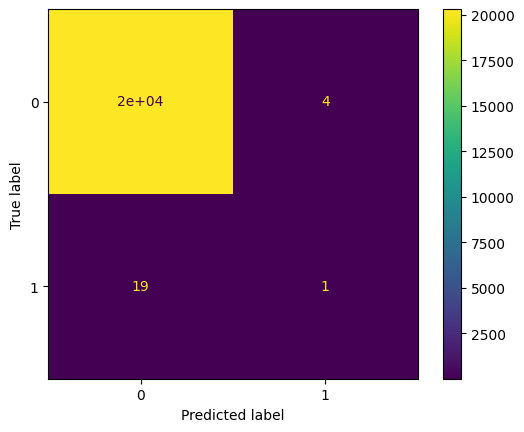

In [ ]:
from functools import cmp_to_key
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

### Curva ROC

1. Classificação Binária: A Curva ROC é usada em problemas de classificação binária, onde o modelo precisa decidir entre duas classes, como fraude versus não fraude

2. Taxa de Verdadeiros Positivos e Falsos Positivos: A curva representa a taxa de verdadeiros positivos (TPR ou Sensibilidade) no eixo y (sensibilidade) e a taxa de falsos positivos (FPR ou 1 - Especificidade) no eixo x (1 - especificidade).

**No modelo quanto mais próxima a Curva ROC estiver do número 1, mais próximo o modelo está de alcançar uma classificação ideal**



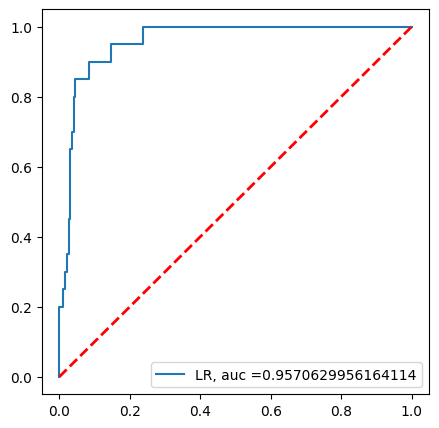

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (5, 5.)
plt.plot(fpr,tpr,label="LR, auc ="+str(auc))
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Balanceamento de dados

O balanceamento de dados é um processo crucial no machine learning e análise de dados que trata da situação em que as classes no conjunto de dados têm distribuições desiguais. Em um cenário de classificação binária, isso significa que uma classe (classe majoritária) tem muito mais exemplos do que a outra (classe minoritária). Esse desequilíbrio pode levar a modelos de machine learning que são tendenciosos em favor da classe majoritária, resultando em desempenho insatisfatório na previsão da classe minoritária.

O que vamos utilizar para relaizar o balanceamento de dados

*   Técnica SMOT utiliza Algoritmo KNN
*   Biblioteca imbalanced-learn



In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [ ]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [ ]:
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
df_balancead = pd.concat([y_resampled, x_resampled], axis=1)
df_balancead

fraude  tempo          valor  saldo_inicial_c1  novo_saldo  \
0            0      1    9839.640000     170136.000000   160296.36   
1            0      1    1864.280000      21249.000000    19384.72   
2            1      1     181.000000        181.000000        0.00   
3            1      1     181.000000        181.000000        0.00   
4            0      1   11668.140000      41554.000000    29885.86   
...        ...    ...            ...               ...         ...   
202989       1      5   17608.962863      17608.962863        0.00   
202990       1      7   12116.291013      12116.291013        0.00   
202991       1      1  231612.880715     231612.880715        0.00   
202992       1      9  547325.144758     547325.144758        0.00   
202993       1      4  159298.594420     159298.594420        0.00   

        saldo_inicial_c2  novo_saldo_c2  tipo_CASH_IN  tipo_CASH_OUT  \
0               0.000000       0.000000         False          False   
1               0.000000       0.000000         False          False   
2               0.000000       0.000000         False          False   
3           21182.000000       0.000000         False           True   
4               0.000000       0.000000         False          False   
...                  ...            ...           ...            ...   
202989          0.000000       0.000000         False          False   
202990          0.000000       0.000000         False          False   
202991       1945.589357    9370.603471         False           True   
202992          0.000000       0.000000         False          False   
202993          0.000000       0.000000         False          False   

        tipo_DEBIT  tipo_PAYMENT  tipo_TRANSFER  
0            False          True          False  
1            False          True          False  
2            False         False           True  
3            False         False          False  
4            False          True          False  
...            ...           ...            ...  
202989       False         False           True  
202990       False         False           True  
202991       False         False           True  
202992       False         False           True  
202993       False         False           True  

[202994 rows x 12 columns]

In [ ]:
df_balancead.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

### Novo Teste do LR

In [ ]:
x = df_balancead.iloc[:, 1:].values
y = df_balancead.iloc[:, 0].values

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 42  # Define uma semente para garantir reprodutibilidade nos resultados

# Divide os dados x e y em conjuntos de treino (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Instancia o modelo de Regressão Logística com um número máximo de iterações definido
lr = LogisticRegression(max_iter=1000)

# Treina o modelo usando os dados de treino
lr.fit(x_train, y_train)

# Faz a previsão usando os dados de teste
y_pred = lr.predict(x_test)

# Avalia o desempenho do modelo com diversas métricas
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

Acurácia: 0.9423877435404813
Precisão: 0.9253062586395919
Recall: 0.96175188267935
F1-score: 0.9431771250880644


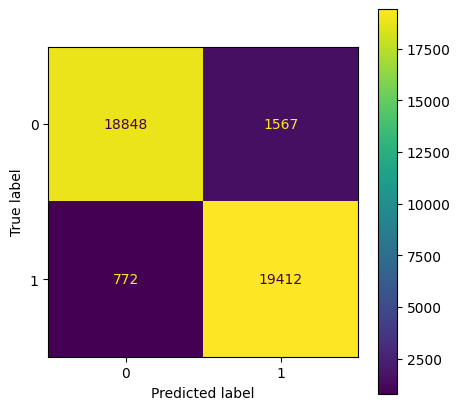

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

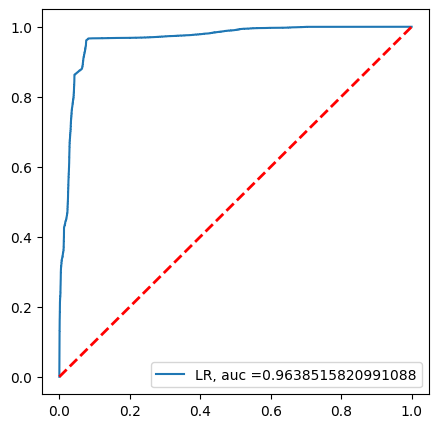

In [ ]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (5, 5.)
plt.plot(fpr,tpr,label="LR, auc ="+str(auc))
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Formulando as hipóteses

In [ ]:
profile = ProfileReport(df_balancead)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Inserir as hipóteses aqui!** (Gráfico Correlations)

- tipo_payment é o que a pessoa utiliza como padrão e a fraude pode ser pela tipo_trensfer

- O cliente pode fazer seus pagamentos durante um periodo do dia como por exemplo durante a manhã e a fraude ocorre durante um periodo diferente, como por exemplo a madrugada.

- O cliente paga suas contas no começo do mes e houve uma movimentação no final do mes, sendo uma fraude

# Aula - Modelo Preditivo

## Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=SEED)

In [ ]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

# Avalia o desempenho do modelo com diversas métricas
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

Acurácia: 0.9599004901598561
Precisão: 0.9388421152208873
Recall: 0.983402695204122
F1-score: 0.9606059139524754


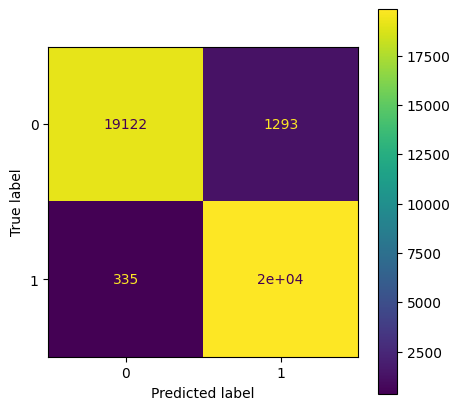

In [ ]:
# Código Matriz de confusão

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

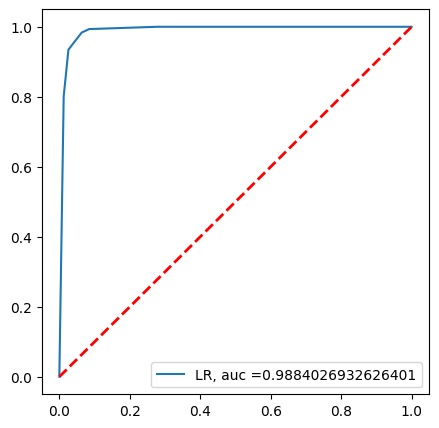

In [ ]:
# Código curva ROC

y_pred_proba = dt.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (5, 5.)
plt.plot(fpr,tpr,label="LR, auc ="+str(auc))
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
  rf = RandomForestClassifier(max_depth= 5, random_state=SEED)

In [ ]:
# modelo para rodar 100 árvoes

model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

# Avalia o desempenho do modelo com diversas métricas
print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
print("Precisão:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1-score:", metrics.f1_score(y_test, y_pred))

Acurácia: 0.9706643020764059
Precisão: 0.9780999848965413
Recall: 0.9625445897740785
F1-score: 0.970259944565136


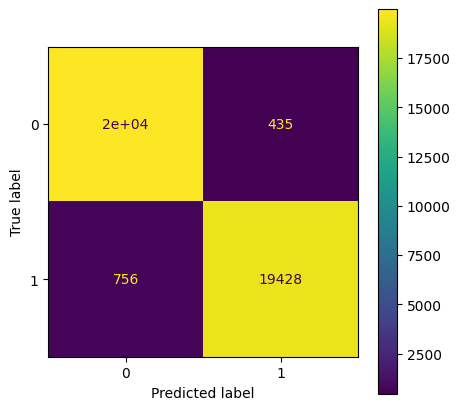

In [ ]:
# Código Matriz de confusão

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

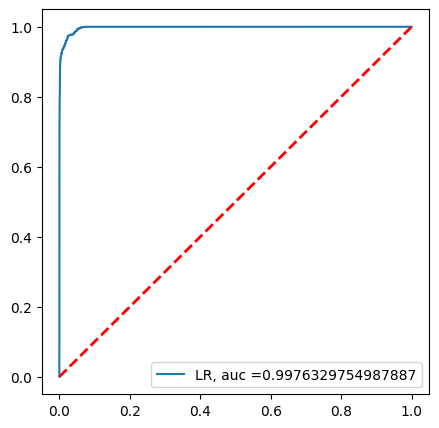

In [ ]:
# Código curva ROC

y_pred_proba = rf.predict_proba(x_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (5, 5.)
plt.plot(fpr,tpr,label="LR, auc ="+str(auc))
plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Análise de Métricas

In [ ]:
# Dicionário de classificadores
classifiers = [
    LogisticRegression(max_iter=1000),
    DecisionTreeClassifier(max_depth=5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state=SEED)
]

LogisticRegression
****Results****
Acurácia: 0.9423877435404813
Precisão: 0.9253062586395919
Recall: 0.96175188267935
F1-score: 0.9431771250880644
DecisionTreeClassifier
****Results****
Acurácia: 0.9599004901598561
Precisão: 0.9388421152208873
Recall: 0.983402695204122
F1-score: 0.9606059139524754
RandomForestClassifier
****Results****
Acurácia: 0.9706643020764059
Precisão: 0.9780999848965413
Recall: 0.9625445897740785
F1-score: 0.970259944565136


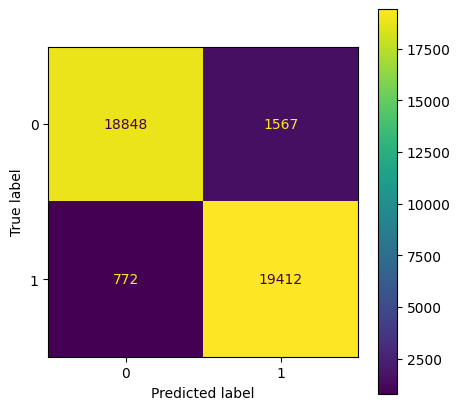

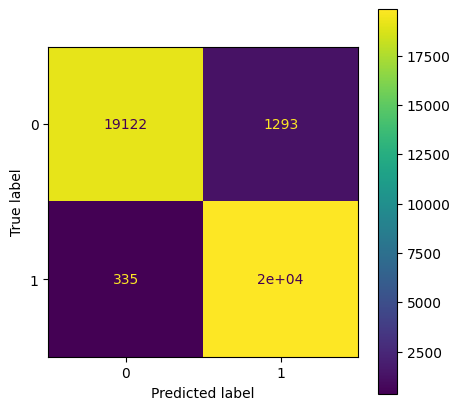

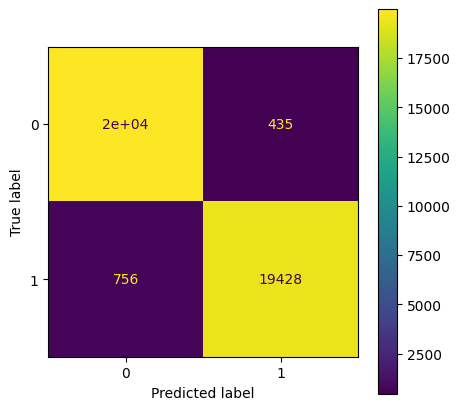

In [ ]:
# For para rodar todos os modelos
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Results****')
  y_pred = clf.predict(x_test)
 # Avalia o desempenho do modelo com diversas métricas
  print("Acurácia:", metrics.accuracy_score(y_test, y_pred))
  print("Precisão:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1-score:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()

# 5

## Melhorando o modelo

In [ ]:
# Definindo uma faixa de valores para n_estimators, variando de 20 a 180 (exclusivo), com passo de 20.
n_estimators = np.arange(20, 200, step=20)

# Critérios de divisão para a árvore de decisão: "gini" e "entropy".
criterion = ["gini", "entropy"]

# Estratégias para considerar o número de recursos ao procurar a melhor divisão: "auto", "sqrt" e "log2".
max_features = ["auto", "sqrt", "log2"]

# Definindo uma faixa de valores para max_depth, variando de 2 a 9 (exclusivo), com passo de 1 em 1
max_depth = list(np.arange(2, 10, step=1))

# Definindo uma faixa de valores para min_samples_split, variando de 2 a 8 (exclusivo), com passo de 2 em 2
min_samples_split = np.arange(2, 10, step=2)

# Definindo possíveis valores para min_samples_leaf: 1, 2 e 4.
min_samples_leaf = [1, 2, 4]

# Definindo opções para bootstrap: True e False.
bootstrap = [True, False]


### **Explicação:**

Este código define várias listas e intervalos de valores que serão usados como hiperparâmetros para treinar um modelo de árvore de decisão ou uma floresta aleatória **(Random Forest).** Esses valores geralmente são usados em técnicas de busca de hiperparâmetros, como a busca em grade **(Grid Search)** ou a busca aleatória **(Random Search)**, para encontrar a combinação de parâmetros que produz o melhor desempenho do modelo.

**n_estimators:** Número de árvores na floresta (usado em modelos de Random Forest).

**criterion:** Função para medir a qualidade de uma divisão.
max_features: Número de recursos a serem considerados ao procurar a melhor divisão.

**max_depth:** Profundidade máxima da árvore.
min_samples_split: Número mínimo de amostras necessárias para dividir um nó.

**min_samples_leaf:** Número mínimo de amostras necessárias em um nó folha.

**bootstrap:** Se as amostras devem ser reamostradas com substituição quando for construída a árvore (usado em Random Forest).

In [ ]:
# Dicionário de Hiperparametros
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}

In [ ]:
# Importa a classe RandomizedSearchCV do módulo sklearn.model_selection
from sklearn.model_selection import RandomizedSearchCV

# Define uma constante para a semente aleatória (SEED) para garantir a reprodutibilidade dos resultados
SEED = 70

# Cria uma instância da classe RandomForestClassifier do módulo sklearn.ensemble
# A semente aleatória (random_state) é definida para garantir que os resultados sejam reprodutíveis
rforest = RandomForestClassifier(random_state=SEED)


### **Explicação:**
**from sklearn.model_selection import RandomizedSearchCV:** Importa a classe RandomizedSearchCV do módulo sklearn.model_selection. Essa classe é usada para realizar uma busca aleatória de hiperparâmetros para modelos de aprendizado de máquina. Ao invés de tentar todas as combinações possíveis de hiperparâmetros **(como no Grid Search)**, ela seleciona aleatoriamente um número fixo de combinações, o que pode ser mais eficiente em termos de tempo de computação.



**SEED = 70:** Define uma semente aleatória (seed) para garantir que os resultados do processo de treinamento e validação sejam reprodutíveis. Usar uma semente fixa ajuda a obter os mesmos resultados se o código for executado novamente.


**rforest = RandomForestClassifier(random_state=SEED):** Cria uma instância do classificador Random Forest (RandomForestClassifier) do módulo sklearn.ensemble. O parâmetro random_state é definido com o valor da semente aleatória (SEED) para garantir a reprodutibilidade dos resultados. O Random Forest é um método de ensemble que combina várias árvores de decisão para melhorar a precisão do modelo e controlar o overfitting.

In [ ]:
# Configura a busca aleatória com RandomizedSearchCV

# Cria uma instância de RandomizedSearchCV com os seguintes parâmetros:
random_cv = RandomizedSearchCV(
    rforest,             # O modelo de classificador Random Forest
    param_grid,          # O dicionário de parâmetros a serem otimizados
    n_iter=5,            # Número de combinações de parâmetros a serem testadas
    cv=3,                # Número de folds para validação cruzada
    scoring="recall",    # Métrica usada para avaliar a performance do modelo
    n_jobs=-1,           # Número de jobs a serem executados em paralelo (-1 usa todos os processadores disponíveis)
    random_state=SEED    # Semente aleatória para garantir a reprodutibilidade dos resultados
)


### **Explicação:**
**rforest:** Este é o modelo RandomForestClassifier criado anteriormente. Ele será otimizado pelo RandomizedSearchCV.

**param_grid:** Um dicionário contendo os hiperparâmetros para otimizar. Cada chave no dicionário corresponde ao nome de um hiperparâmetro e o valor associado é uma lista de valores que você deseja testar para esse hiperparâmetro.

**n_iter=5:** Define o número de combinações de hiperparâmetros a serem testadas aleatoriamente. Neste caso, cinco combinações serão testadas.

**cv=3:** Define o número de folds (divisões) para a validação cruzada. Isso significa que os dados de treinamento serão divididos em três partes e o modelo será treinado e validado três vezes, cada vez usando uma parte diferente dos dados para validação e o restante para treinamento.

**scoring="recall":** Define a métrica usada para avaliar a performance do modelo. Neste caso, a métrica de recall será usada, que é importante em problemas de classificação onde é crítico minimizar falsos negativos, como na detecção de fraudes.

**n_jobs=-1:** Configura o número de jobs a serem executados em paralelo. Definindo n_jobs como -1, todos os processadores disponíveis serão usados, o que pode acelerar significativamente o processo de busca.

**random_state=SEED:** Define a semente aleatória para garantir que os resultados da busca sejam reprodutíveis. Usar uma semente fixa ajuda a obter os mesmos resultados se o código for executado novamente.

In [ ]:
%%time
# Ajusta o modelo aos dados de entrada x e y usando a busca aleatória com RandomizedSearchCV
rcv = random_cv.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


CPU times: user 40.6 s, sys: 611 ms, total: 41.2 s
Wall time: 3min 35s


### **Explicação:**

**%%time:** Esta é uma magic command do Jupyter Notebook que mede o tempo de execução da célula inteira. Ao usar %%time no início da célula, o tempo total necessário para executar todas as instruções na célula será exibido.

**random_cv.fit(x, y):** Este método ajusta o modelo RandomizedSearchCV aos dados x e y. Ele realiza a busca pelos melhores hiperparâmetros dentro do espaço de busca definido por param_grid. A busca será feita em **n_iter iterações**, utilizando validação cruzada com **cv folds**, e a performance será avaliada pela **métrica scoring.**

**rcv:** A variável rcv armazenará o resultado do ajuste do modelo **RandomizedSearchCV**. Isso inclui o modelo ajustado com os melhores hiperparâmetros encontrados.

In [ ]:
pd.DataFrame(rcv.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      37.628129      1.987777         1.051499        0.315202   
1      14.432600      0.397927         0.617449        0.013025   
2      13.996814      1.304600         0.538879        0.140623   
3      27.079330      1.064919         0.913078        0.229991   
4      18.572014      0.435450         0.722939        0.091286   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
0                120                       4                      2   
1                120                       4                      2   
2                 40                       8                      1   
3                100                       8                      4   
4                160                       6                      2   

  param_max_features param_max_depth param_criterion param_bootstrap  \
0               auto               9            gini           False   
1               auto               2            gini           False   
2               sqrt               7         entropy           False   
3               log2               9         entropy            True   
4               log2               2            gini           False   

                                              params  split0_test_score  \
0  {'n_estimators': 120, 'min_samples_split': 4, ...           0.990748   
1  {'n_estimators': 120, 'min_samples_split': 4, ...           0.914223   
2  {'n_estimators': 40, 'min_samples_split': 8, '...           0.981379   
3  {'n_estimators': 100, 'min_samples_split': 8, ...           0.992374   
4  {'n_estimators': 160, 'min_samples_split': 6, ...           0.914223   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999054           0.991724         0.993842        0.003707   
1           0.933083           0.928913         0.925407        0.008089   
2           0.999823           0.972245         0.984482        0.011470   
3           0.999438           0.988502         0.993438        0.004528   
4           0.929182           0.928913         0.924106        0.006989   

   rank_test_score  
0                1  
1                4  
2                3  
3                2  
4                5

In [ ]:
# Obtém os melhores hiperparâmetros encontrados pelo RandomizedSearchCV
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

### **Significado dos Hiperparâmetros**

**n_estimators: 120**
Número de árvores na floresta. Mais árvores geralmente melhoram o desempenho, mas aumentam o tempo de processamento.

**min_samples_split: 4**
Número mínimo de amostras necessárias para dividir um nó. Um valor mais alto pode evitar sobreajuste.

**min_samples_leaf: 2**
Número mínimo de amostras em um nó folha. Ajuda a regularizar o modelo.

**max_features: 'auto'**
Número de características a serem consideradas ao procurar a melhor divisão. 'auto' usa todas as características.

**max_depth: 9**
Profundidade máxima das árvores. Limita o crescimento da árvore para evitar sobreajuste.

**criterion: 'gini'**
Função usada para medir a qualidade de uma divisão. O índice de Gini mede a impureza de um nó.

**bootstrap: False**
Indica se amostras de bootstrap são usadas ao construir árvores. False significa que todas as amostras são usadas sem substituição.

## Resultados Finais

In [ ]:
# Cria uma instância do RandomForestClassifier usando os melhores parâmetros encontrados
# e define a semente aleatória para reprodutibilidade
rfn = RandomForestClassifier(**rcv.best_params_, random_state=SEED)

# Ajusta (treina) o modelo RandomForestClassifier com os dados de treinamento
model = rfn.fit(x_train, y_train)

# Usa o modelo treinado para fazer previsões nos dados de teste
y_pred = rfn.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9922658193551566
Precisão: 0.9918803841964551
Recall: 0.9925683709869203
F1: 0.9922242583329206


Os dados estatísticos apresentados indicam uma clara melhoria em relação a modelos anteriores, com um aumento na acurácia, precisão, recall e F1-score.

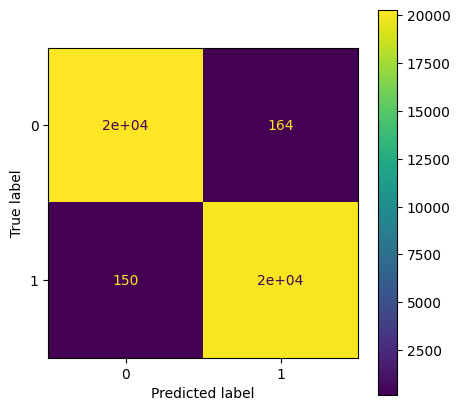

In [ ]:
# Matrix de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Na matriz de confusão, encontramos 150 casos de falsos negativos e 164 casos de falsos positivos. Isso indica que deixamos de detectar 150 fraudes reais, enquanto erroneamente alertamos 164 pessoas sobre possíveis fraudes que não ocorreram. Este resultado representa uma melhoria em relação aos modelos anteriores.

## Conclusão

Destacamos dois pontos cruciais na detecção de fraudes. Primeiramente, observamos que o cliente tinha um padrão de compras regulares durante o dia, mas a fraude ocorria predominantemente à noite. Em segundo lugar, notamos que o cliente poderia realizar muitas transações no início do mês, pagando todas as contas rapidamente, mas no final do mês, poderia ter menos fluxo de dinheiro, levando o banco a suspeitar de transações que normalmente seriam consideradas legítimas.

Para abordar essas questões de tempo relacionadas à fraude, sugerimos uma solução como a implementação de captchas. Essas verificações adicionais podem aumentar significativamente a segurança do cliente, especialmente durante horários não convencionais. Por exemplo, durante uma transação via celular, poderia ser solicitado ao usuário que confirme sua identidade respondendo a perguntas como "Você confirma esta transação?" ou "Você é um usuário legítimo?" A implementação desses captchas pode fortalecer a segurança e ajudar a mitigar potenciais fraudes.

Antes de avançarmos, é essencial documentar essas hipóteses e soluções propostas para discutir com nossa equipe de segurança.

Ao analisar os padrões de movimentação financeira do cliente, identificamos dois cenários críticos de fraude. Primeiramente, notamos que as fraudes ocorriam frequentemente fora do horário comercial, como durante a madrugada, enquanto o cliente tinha um histórico de transações predominantemente diurnas. Em segundo lugar, observamos que o cliente costumava concentrar suas principais movimentações no início do mês, mas a fraude foi detectada em um período atípico.

Para abordar essas questões, propomos duas soluções estratégicas. Em relação aos horários não convencionais, recomendamos a implementação de captchas para aumentar a segurança durante esses períodos. Isso poderia incluir verificações adicionais de identidade, como perguntas de segurança, durante transações realizadas fora dos horários habituais do cliente.

Além disso, para mitigar o risco associado a transferências fraudulentas, sugerimos que o banco exija informações adicionais de segurança para validar tais transações. Isso poderia envolver a solicitação de respostas a perguntas específicas durante o processo de autorização, especialmente para clientes cujos padrões de pagamento usualmente não incluem transferências.

Ao finalizar nossa análise, apresentamos essas recomendações à equipe responsável pela segurança para a implementação de medidas preventivas eficazes. Este processo reflete nosso compromisso em identificar vulnerabilidades e propor soluções que fortaleçam a segurança financeira dos clientes.